In [74]:
import anndata
import pandas as pd
import numpy as np
import sklearn
import scipy.sparse
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import scanpy as sc

Need to build:
- matrix.mtx
- bins.tsv
- barcode.tsv

In [2]:
# Used for testing it works

def create_anndata(path: os.PathLike) -> anndata.AnnData:
  """Creates anndata object from raw data.

  Args:
    path: Path to the 10x formatted input files.

  Returns:
    anndata object for the experiment.
  """
  with tf.io.gfile.GFile(os.path.join(path, 'matrix.mtx'), mode='rb') as f:
    matrix = scipy.io.mmread(f)
  matrix = scipy.sparse.csr_matrix(matrix)
  adata = anndata.AnnData(matrix)
  adata = adata.transpose()
  with tf.io.gfile.GFile(os.path.join(path, 'barcodes.tsv'), mode='r') as f:
    barcodes = pd.read_csv(f, sep='\t', header=None)[0]
  adata.obs_names = barcodes
  with tf.io.gfile.GFile(os.path.join(path, 'bins.tsv'), mode='r') as f:
    bins = pd.read_csv(f, sep='\t', header=None)[0]
  adata.var_names = bins
  return adata


In [51]:
def rename_grange(grange):
  a, b, c = grange.split('_')
  return f'{a}:{b}-{c}'
  
def clean_data(path):
  df = pd.read_csv(path, sep='\t', index_col=0)
  keep = (df.index.map(lambda x: len(x.split('_'))) == 3)
  df = df[keep]
  df.index = df.index.map(rename_grange)
  return df.T

def save_anndata(df, path):
  with open(os.path.join(path, 'barcodes.tsv'), 'w') as f:
    for bc in df.index:
      f.write(f'{bc}\n')

  with open(os.path.join(path, 'bins.tsv'), 'w') as f:
    for b in df.keys():
      f.write(f'{b}\t{b}\n')

  scipy.io.mmwrite(os.path.join(path, 'matrix.mtx'), df.T.values)

In [61]:
def save_anndata(adata: anndata.AnnData, output_dir: os.PathLike):
  """Saves AnnData object in 10X format."""
  tf.io.gfile.makedirs(output_dir)
  with tf.io.gfile.GFile(os.path.join(output_dir, 'matrix.mtx'), mode='w') as f:
    scipy.io.mmwrite(f, adata.X.transpose())
  new_bins = pd.DataFrame(adata.var_names, columns=['var_names'])
  with tf.io.gfile.GFile(os.path.join(output_dir, 'bins.tsv'), mode='w') as f:
    new_bins.to_csv(
        f,
        sep='\t',
        index=False,
        header=False,
        columns=['var_names', 'var_names'])
  with tf.io.gfile.GFile(os.path.join(output_dir, 'barcodes.tsv'), 'w') as f:
    for bc in adata.obs_names:
      f.write(f'{bc}\n')

## Create matrices

In [62]:
ramos = clean_data('/home/gamazeps/data/tmp/GSM3290887_CountTable_Ramos_scChIP_K4me3.txt')
jurkat = clean_data('/home/gamazeps/data/tmp/GSM3290887_CountTable_Jurkat_scChIP_K4me3.txt')

df = pd.concat([jurkat, ramos])
adata = anndata.AnnData(df)

tf.io.gfile.makedirs('/home/gamazeps/data/matrices/scChIP_Grosselin_2019/H3K4me3/raw/5k')
save_anndata(adata, '/home/gamazeps/data/matrices/scChIP_Grosselin_2019/H3K4me3/raw/5k')

with open('/home/gamazeps/data/matrices/scChIP_Grosselin_2019/H3K4me3/raw/5k/annot.txt', 'w') as f:
  for _ in range(len(jurkat)):
    f.write('Jurkat\n')
  for _ in range(len(ramos)):
    f.write('Ramos\n')

/tmp/ipykernel_291623/745553677.py:5: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


In [63]:
ramos = clean_data('/home/gamazeps/data/tmp/GSM3290888_CountTable_Ramos_scChIP_K27me3.txt')
jurkat = clean_data('/home/gamazeps/data/tmp/GSM3290888_CountTable_Jurkat_scChIP_K27me3.txt')

df = pd.concat([jurkat, ramos])
adata = anndata.AnnData(df)

tf.io.gfile.makedirs('/home/gamazeps/data/matrices/scChIP_Grosselin_2019/H3K27me3/raw/50k')
save_anndata(adata, '/home/gamazeps/data/matrices/scChIP_Grosselin_2019/H3K27me3/raw/50k')

with open('/home/gamazeps/data/matrices/scChIP_Grosselin_2019/H3K27me3/raw/50k/annot.txt', 'w') as f:
  for _ in range(len(jurkat)):
    f.write('Jurkat\n')
  for _ in range(len(ramos)):
    f.write('Ramos\n')

/tmp/ipykernel_291623/4127090634.py:5: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


Checking that we can indeed read them correctly

In [64]:
%%time
k27 = create_anndata('/home/gamazeps/data/matrices/scChIP_Grosselin_2019/H3K27me3/raw/50k/')
k4 = create_anndata('/home/gamazeps/data/matrices/scChIP_Grosselin_2019/H3K4me3/raw/5k/')

/tmp/ipykernel_291623/2296361045.py:15: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(matrix)


CPU times: user 12min 4s, sys: 1.99 s, total: 12min 6s
Wall time: 12min 6s


/tmp/ipykernel_291623/2296361045.py:15: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(matrix)


# Inspecting embeddings

/tmp/ipykernel_291623/3243146676.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


SnapATAC.csv
AnnData object with n_obs × n_vars = 6083 × 10
    obs: 'Annotation'


/home/gamazeps/dev/benchmark_scepigenomics/venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


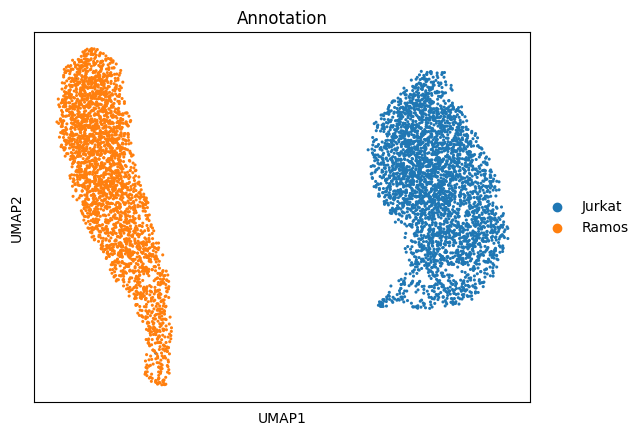

/tmp/ipykernel_291623/3243146676.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


LSI.csv
AnnData object with n_obs × n_vars = 6083 × 9
    obs: 'Annotation'


/home/gamazeps/dev/benchmark_scepigenomics/venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


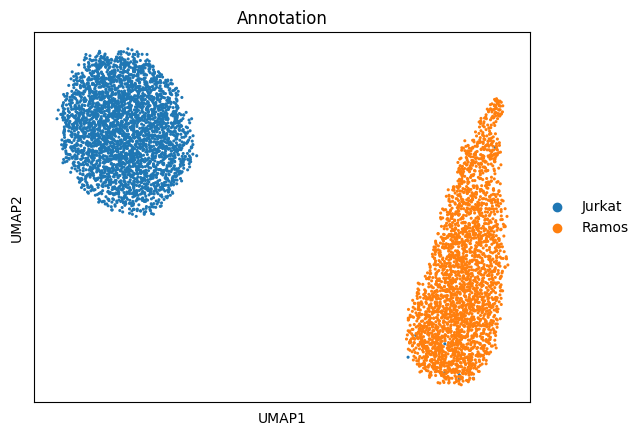

/tmp/ipykernel_291623/3243146676.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


pca.csv
AnnData object with n_obs × n_vars = 6083 × 9
    obs: 'Annotation'


/home/gamazeps/dev/benchmark_scepigenomics/venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


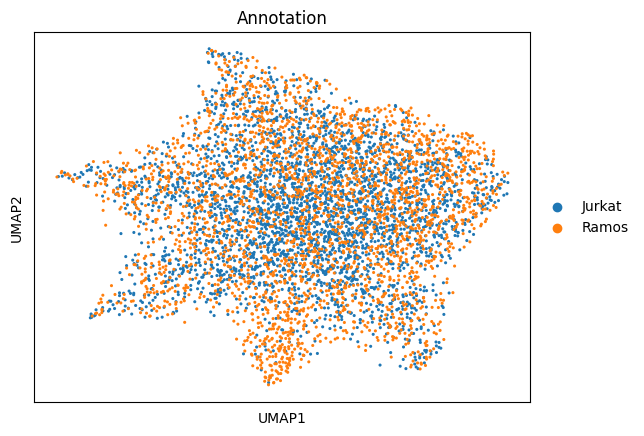

/tmp/ipykernel_291623/3243146676.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


peakVI.csv
AnnData object with n_obs × n_vars = 6083 × 10
    obs: 'Annotation'


/home/gamazeps/dev/benchmark_scepigenomics/venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


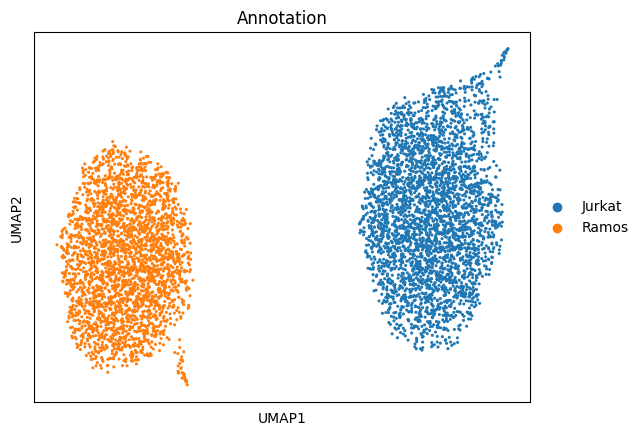

/tmp/ipykernel_291623/3243146676.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


SCALE.csv
AnnData object with n_obs × n_vars = 6083 × 10
    obs: 'Annotation'


/home/gamazeps/dev/benchmark_scepigenomics/venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


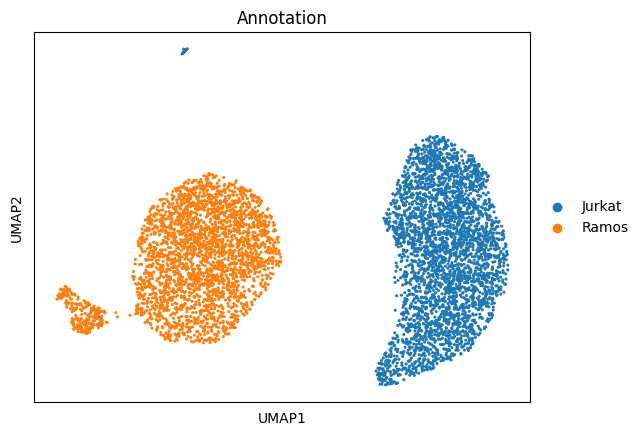

/tmp/ipykernel_291623/3243146676.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


tfidf_nmf.csv
AnnData object with n_obs × n_vars = 6083 × 10
    obs: 'Annotation'


/home/gamazeps/dev/benchmark_scepigenomics/venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


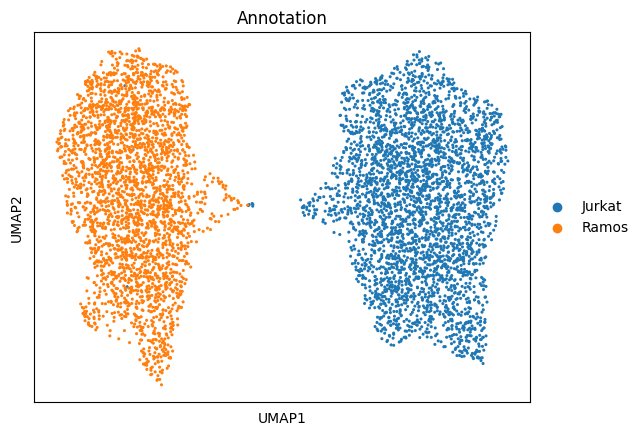

/tmp/ipykernel_291623/3243146676.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


Signac.csv
AnnData object with n_obs × n_vars = 6083 × 50
    obs: 'Annotation'


/home/gamazeps/dev/benchmark_scepigenomics/venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


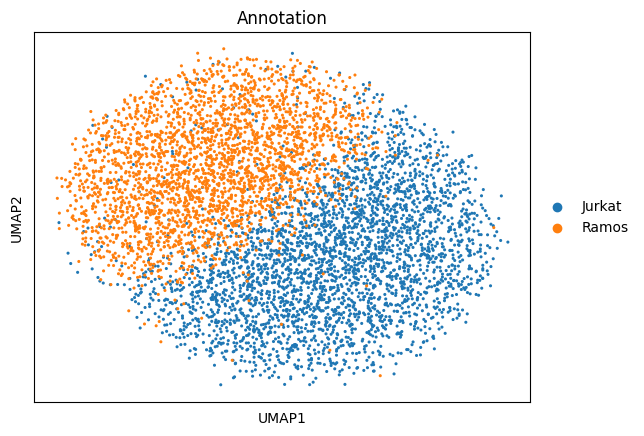

/tmp/ipykernel_291623/3243146676.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


Chromscape_LSI_50.csv
AnnData object with n_obs × n_vars = 6083 × 49
    obs: 'Annotation'


/home/gamazeps/dev/benchmark_scepigenomics/venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


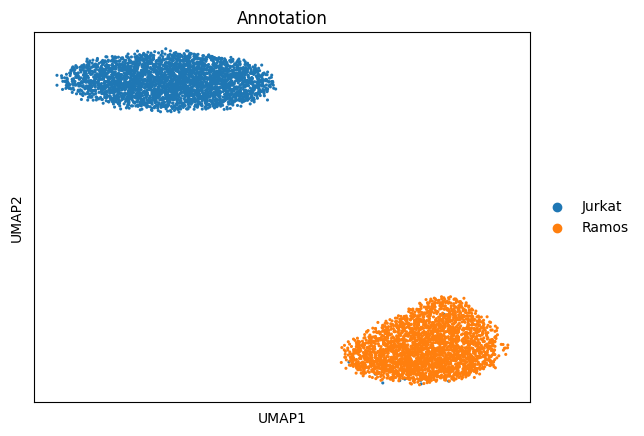

/tmp/ipykernel_291623/3243146676.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


cisTopic.csv
AnnData object with n_obs × n_vars = 6083 × 11
    obs: 'Annotation'


/home/gamazeps/dev/benchmark_scepigenomics/venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


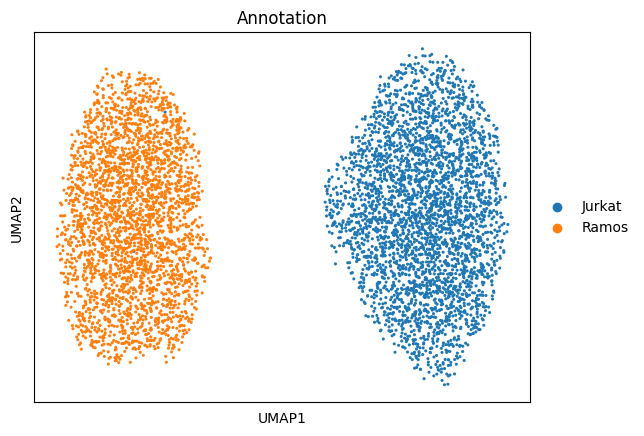

/tmp/ipykernel_291623/3243146676.py:9: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(df)


nmf.csv
AnnData object with n_obs × n_vars = 6083 × 10
    obs: 'Annotation'


/home/gamazeps/dev/benchmark_scepigenomics/venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


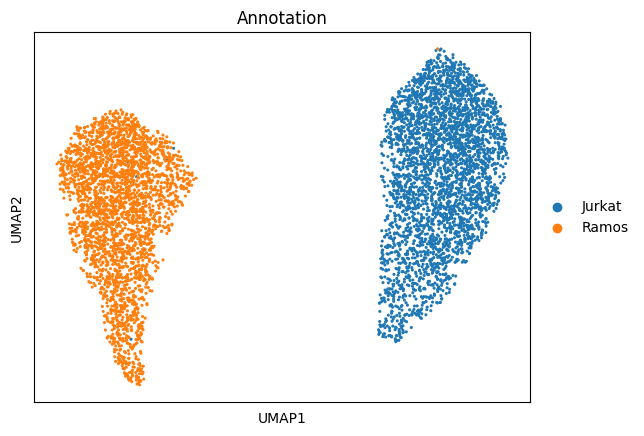

In [80]:
bp = '/home/gamazeps/data/embeddings/scChIP_Grosselin_2019/H3K4me3/raw/50k'

with open('/home/gamazeps/data/matrices/scChIP_Grosselin_2019/H3K4me3/raw/5k/annot.txt', 'r') as f:
  labels = pd.read_csv(f, sep='\t', header=None)[0]

for fname in os.listdir(bp):
  with open(os.path.join(bp, fname), 'r') as f:
    df = pd.read_csv(f, index_col=0)
  adata = anndata.AnnData(df)
  labels.index = adata.obs_names
  adata.obs['Annotation'] = labels
  print(fname)
  print(adata)
  sc.pp.neighbors(adata)
  sc.tl.umap(adata)
  sc.pl.umap(adata, color='Annotation')

    
